In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_1.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 1.75
part_sd = 0.25

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

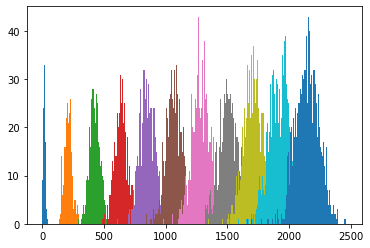

In [2]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [3]:
energy_mean= [np.mean(data_) for data_ in data]
energy_std = [np.std(data_) for data_ in data]

a = 0.21514511117683496 +- 0.0001283736427205148
b = -3.938605755946026 +- 0.2510643106850572


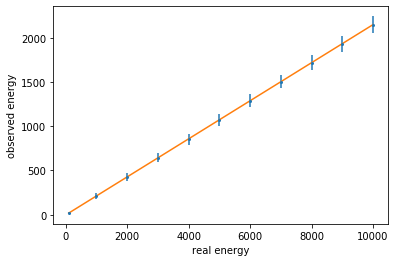

In [4]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [5]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [6]:
f = open("reduction_1.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [7]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]

# def curve(x, mu, sigma, nevents):
#     return nevents / (np.sqrt(2 * np.pi * sigma**2) * x) * np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

sigmas = {}
delta_sigmas = {}

In [8]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 508.6400878542261 +- 3.1574212757368385
sigma = 95.40368603417991 +- 2.344331762521714
nevents = 12849.114673200032 +- 418.34867986976735
mean = 506.28696246049856
std = 98.89286516625019




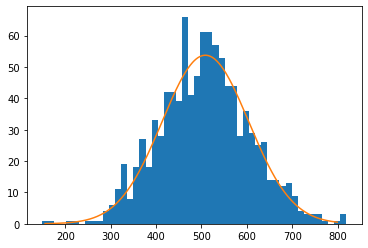

In [9]:
proc(0, 50, [500, 150, 10000])

mu = 1502.401658961971 +- 5.276219251766668
sigma = 169.15731201416864 +- 4.1416846454107334
nevents = 21243.44482368283 +- 648.8329492239063
mean = 1503.1347123204637
std = 173.28010435464114




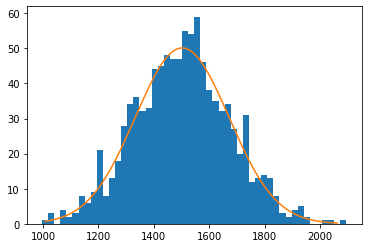

In [10]:
proc(1, 50, [1500, 200, 100000])

mu = 2503.7446451779933 +- 7.035343473325075
sigma = 219.6110167509408 +- 5.636038709740253
nevents = 35002.73004955405 +- 1089.4966834601119
mean = 2508.310819400349
std = 225.6951678706225




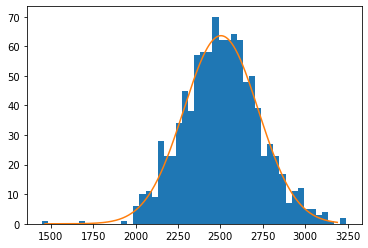

In [11]:
proc(2, 50, [2500, 300, 100000])

mu = 3495.720371549968 +- 6.83493271473419
sigma = 257.22679969323923 +- 4.996967327548286
nevents = 39993.16521771494 +- 1041.4800040564278
mean = 3492.9469593118984
std = 261.72241030044523




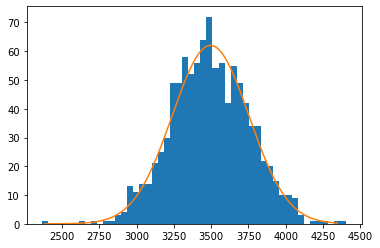

In [12]:
proc(3, 50, [3500, 400, 100000])

mu = 4508.984837548231 +- 9.124415334732074
sigma = 282.2163223999092 +- 6.760373901618915
nevents = 34315.09199509586 +- 1089.4361727460923
mean = 4514.492498728571
std = 296.7507720019388




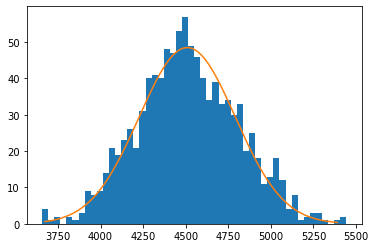

In [13]:
proc(4, 50, [4500, 500, 100000])

mu = 5515.131660874587 +- 12.230495483769344
sigma = 331.7720470559643 +- 9.59558660234231
nevents = 41936.91914665665 +- 1495.5768919656466
mean = 5517.786821194411
std = 327.8102106524532




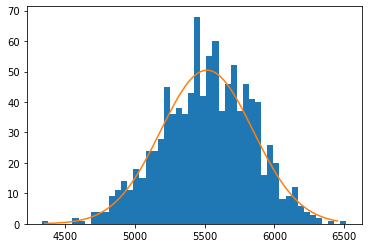

In [14]:
proc(5, 50, [5500, 500, 100000])

mu = 6490.0519189238 +- 11.654088806963667
sigma = 336.47312836925533 +- 9.016170957615108
nevents = 66422.62792066096 +- 2280.2617649990366
mean = 6484.128090734655
std = 364.6102059262451




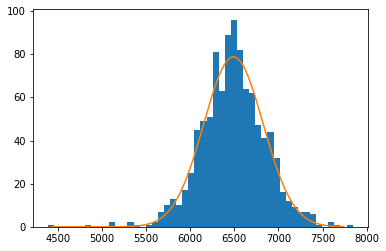

In [15]:
proc(6, 50, [6500, 500, 100000])

mu = 7508.731459545679 +- 13.443451138724404
sigma = 372.51809127112 +- 9.97790909413073
nevents = 49509.219786578906 +- 1761.8598165780713
mean = 7507.446309148839
std = 396.8324248012228




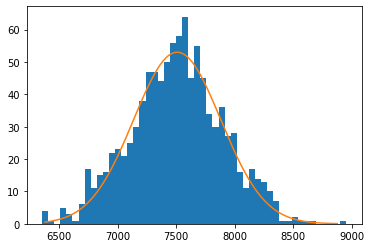

In [16]:
proc(7, 50, [7500, 600, 100000])

mu = 8484.539197327536 +- 11.200918649484628
sigma = 407.0874483468118 +- 8.536413111184903
nevents = 59784.55697189879 +- 1623.255238423084
mean = 8484.975032807071
std = 413.54971150713016




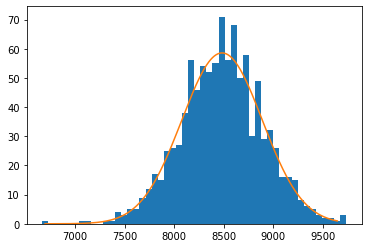

In [17]:
proc(8, 50, [8500, 500, 1000000])

mu = 9505.348858455282 +- 16.13367534006388
sigma = 440.8925256632255 +- 11.976290392147224
nevents = 83775.14833930062 +- 2997.018502963038
mean = 9498.442628827803
std = 454.1156163028226




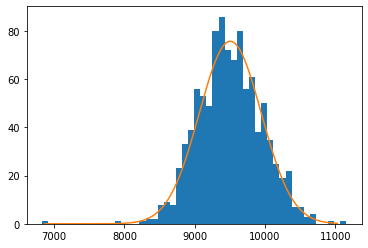

In [18]:
proc(9, 50, [9500, 700, 1000000])

In [19]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = 0.001211322841768241 +- 0.0014803912414238303
b = 4.260862369014632 +- 0.10317811614856819


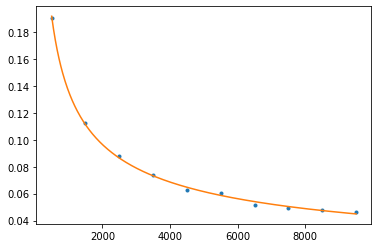

In [20]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [21]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()

a = 0.0058999657917244465 +- 0.014666542533262605
b = 4.511570009326555 +- 0.7873770428669601
c = -0.07020269218940299 +- 0.21833752115421162


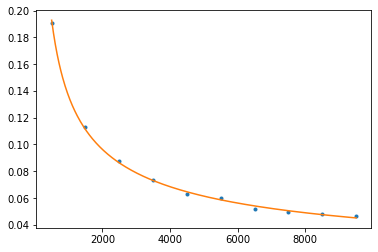

In [22]:
def curve_energy_modified(x, a, b, c):
    return a + b / np.sqrt(x) + c / np.sqrt(np.sqrt(x))

popt, pcov = spopt.curve_fit(curve_energy_modified, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b, c = popt
delta_a, delta_b, delta_c = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}\nc = {c} +- {delta_c}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy_modified(x, a, b, c))